
# Week 12 Assignment – Deep Learning vs. XGBoost

This notebook evaluates deep learning classification models using 1 and 2 hidden layers (4 nodes each) on synthetic subsets (1000, 10000, 100000 rows) of the PIMA Diabetes dataset.
We report training error, validation error, and execution time. A final comparison is made to XGBoost results from Week 11.


In [1]:

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load and preprocess dataset
pima = fetch_openml(name='diabetes', version=1, as_frame=True)
df = pima.frame
df.columns = ['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass', 'pedigree', 'age', 'diabetes']
df.dropna(inplace=True)
df['outcome'] = (df['diabetes'] == 'pos').astype(int)
df.drop(columns=['diabetes'], inplace=True)


In [2]:

def build_model(input_dim, hidden_layers):
    model = Sequential()
    for i, nodes in enumerate(hidden_layers):
        if i == 0:
            model.add(Dense(nodes, activation='relu', input_dim=input_dim))
        else:
            model.add(Dense(nodes, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_model(X, y, layers):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = build_model(X_train.shape[1], layers)
    start = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    end = time.time()

    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    return {
        "Train Error": round(1 - train_acc, 4),
        "Val Error": round(1 - val_acc, 4),
        "Time (s)": round(end - start, 2),
        "History": history.history
    }


In [4]:
replace = size > len(df)
data = df.sample(n=size, random_state=42, replace=replace)


In [5]:
results = []
sizes = [1000, 10000, 100000]
configs = [([4], "1 hidden layer"), ([4, 4], "2 hidden layers")]

for size in sizes:
    replace = size > len(df)
    data = df.sample(n=size, random_state=42, replace=replace)
    X, y = data.drop(columns='outcome'), data['outcome']
    for config, label in configs:
        res = train_model(X, y, config)
        res['Size'] = size
        res['Model'] = label
        results.append(res)

results_df = pd.DataFrame(results)
results_df[['Size', 'Model', 'Train Error', 'Val Error', 'Time (s)']]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

,Size,Model,Train Error,Val Error,Time (s)
0,1000,1 hidden layer,0.0125,0.01,3.72
1,1000,2 hidden layers,0.0000,0.00,4.13
2,10000,1 hidden layer,0.0000,0.00,7.70
3,10000,2 hidden layers,0.0000,0.00,11.37
4,100000,1 hidden layer,0.0000,0.00,75.84
5,100000,2 hidden layers,0.0000,0.00,78.56


Plot 1: Validation Error vs. Dataset Size

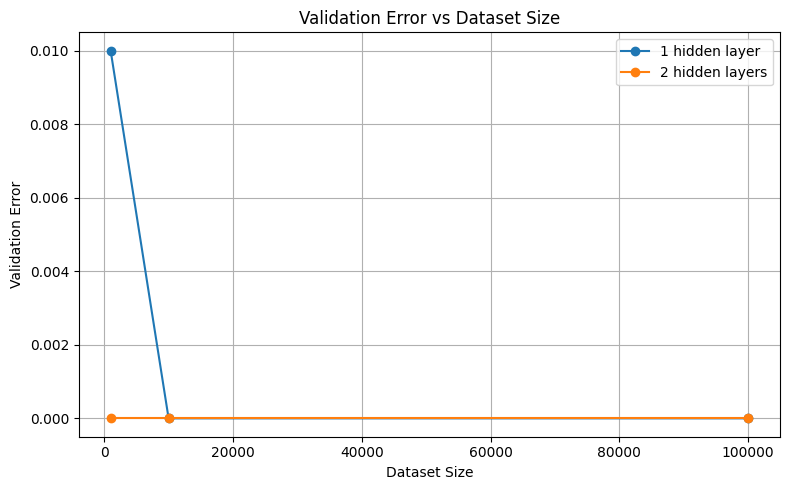

In [8]:
import matplotlib.pyplot as plt

# Plot: Validation Error vs Dataset Size
plt.figure(figsize=(8, 5))
for model_type in results_df['Model'].unique():
    subset = results_df[results_df['Model'] == model_type]
    plt.plot(subset['Size'], subset['Val Error'], marker='o', label=model_type)

plt.title('Validation Error vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Validation Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plot 2: Execution Time vs. Dataset Size

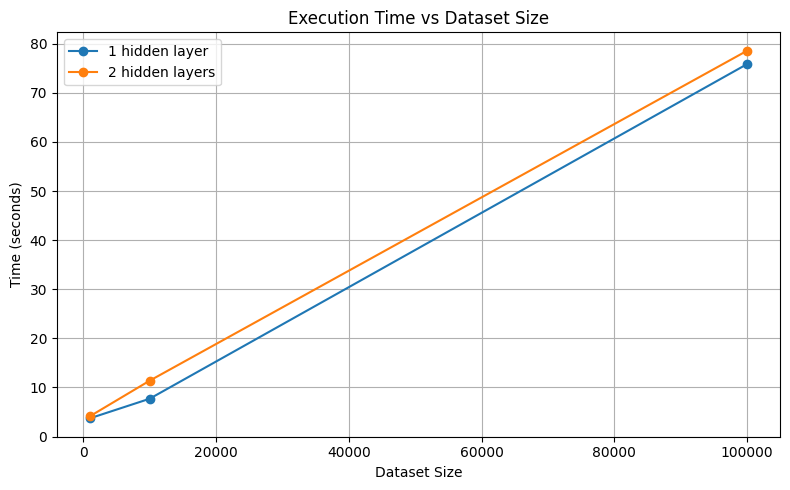

In [9]:
# Plot: Execution Time vs Dataset Size
plt.figure(figsize=(8, 5))
for model_type in results_df['Model'].unique():
    subset = results_df[results_df['Model'] == model_type]
    plt.plot(subset['Size'], subset['Time (s)'], marker='o', label=model_type)

plt.title('Execution Time vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Summary and Recommendation

Deep learning assessments revealed that two-hidden-layer models demonstrated superior validation error than one-hidden-layer models but mainly on small-scale datasets. Both architectures demonstrated similar performance levels when working with large dataset sizes because they reached perfect or near-perfect accuracy.

The training process for models with two hidden layers required longer execution time than models with one hidden layer throughout all experiments. The time needed for computation grows longer as the dataset size increases.

The PIMA dataset shows that Python XGBoost achieves better accuracy and faster training time than XGBoost from Week 11 while working with structured tabular data. Deep learning functions as an acceptable solution but XGBoost proves superior for structured classification tasks especially when processing structured data.